In [1]:
# to make plots interactive
%matplotlib notebook

In [2]:
# dependencies
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reference file path
file_path = "country_vaccinations.csv"

# Import the vaccine csv as a DataFrame
vac_data_df = pd.read_csv(file_path, encoding="utf-8")
vac_data_df.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Algeria,DZA,2021-01-29,0.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
1,Algeria,DZA,2021-01-30,30.0,NaN,NaN,30.0,30.0,0.00,NaN,NaN,1.0,Sputnik V,Ministry of Health,https://www.aps.dz/regions/116777-blida-covid-...
2,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [4]:
# List of columns for reference
vac_data_df.columns

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')

In [5]:
# Unique vaccine manufacturers
vac_names = vac_data_df["vaccines"].unique()
vac_names

array(['Sputnik V', 'Pfizer/BioNTech', 'Pfizer/BioNTech, Sinopharm',
       'Moderna, Pfizer/BioNTech', 'Oxford/AstraZeneca, Sinovac',
       'CNBG, Sinovac', 'Oxford/AstraZeneca, Pfizer/BioNTech',
       'Covaxin, Oxford/AstraZeneca', 'Sinovac',
       'Oxford/AstraZeneca, Sinopharm', 'Oxford/AstraZeneca',
       'Pfizer/BioNTech, Sinovac',
       'Pfizer/BioNTech, Sinopharm, Sputnik V'], dtype=object)

In [6]:
# List of countries in dataset
countries = vac_data_df["country"].unique()
countries

array(['Algeria', 'Argentina', 'Austria', 'Bahrain', 'Belgium', 'Bermuda',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'China', 'Costa Rica',
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Ecuador', 'England',
       'Estonia', 'Finland', 'France', 'Germany', 'Gibraltar', 'Greece',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland',
       'Isle of Man', 'Israel', 'Italy', 'Kuwait', 'Latvia', 'Lithuania',
       'Luxembourg', 'Malta', 'Mexico', 'Morocco', 'Myanmar',
       'Netherlands', 'Northern Cyprus', 'Northern Ireland', 'Norway',
       'Oman', 'Panama', 'Poland', 'Portugal', 'Romania', 'Russia',
       'Saudi Arabia', 'Scotland', 'Serbia', 'Seychelles', 'Singapore',
       'Slovakia', 'Slovenia', 'Spain', 'Sri Lanka', 'Sweden',
       'Switzerland', 'Turkey', 'United Arab Emirates', 'United Kingdom',
       'United States', 'Wales'], dtype=object)

In [7]:
# clean df for daily vaccine info
daily_vaccinations = vac_data_df[["date", "country", "daily_vaccinations"]]
daily_vaccinations

,date,country,daily_vaccinations
0,2021-01-29,Algeria,NaN
1,2021-01-30,Algeria,30.0
2,2020-12-29,Argentina,NaN
3,2020-12-30,Argentina,15656.0
4,2020-12-31,Argentina,15656.0
...,...,...,...
1924,2021-01-27,Wales,20845.0
1925,2021-01-28,Wales,21463.0
1926,2021-01-29,Wales,19705.0
1927,2021-01-30,Wales,19885.0


In [8]:
# Individual dates for reported data
report_data = vac_data_df["date"].unique()
report_data

array(['2021-01-29', '2021-01-30', '2020-12-29', '2020-12-30',
       '2020-12-31', '2021-01-01', '2021-01-02', '2021-01-03',
       '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
       '2021-01-08', '2021-01-09', '2021-01-10', '2021-01-11',
       '2021-01-12', '2021-01-13', '2021-01-14', '2021-01-15',
       '2021-01-16', '2021-01-17', '2021-01-18', '2021-01-19',
       '2021-01-20', '2021-01-21', '2021-01-22', '2021-01-23',
       '2021-01-24', '2021-01-25', '2021-01-26', '2021-01-27',
       '2021-01-28', '2021-01-31', '2021-02-01', '2020-12-23',
       '2020-12-24', '2020-12-25', '2020-12-26', '2020-12-27',
       '2020-12-28', '2020-12-19', '2020-12-15', '2020-12-16',
       '2020-12-17', '2020-12-18', '2020-12-20', '2020-12-21',
       '2020-12-22', '2020-12-13', '2020-12-14'], dtype=object)

In [9]:
# Vaccine data for Ireland
ireland_df = vac_data_df.loc[vac_data_df["country"] == "Ireland"]
ireland_df

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
830,Ireland,IRL,2020-12-31,1800.0,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
831,Ireland,IRL,2021-01-01,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,111.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
832,Ireland,IRL,2021-01-02,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,111.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
833,Ireland,IRL,2021-01-03,NaN,NaN,NaN,NaN,550.0,NaN,NaN,NaN,111.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
834,Ireland,IRL,2021-01-04,4000.0,NaN,NaN,NaN,550.0,0.08,NaN,NaN,111.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
835,Ireland,IRL,2021-01-05,NaN,NaN,NaN,NaN,1194.0,NaN,NaN,NaN,242.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
836,Ireland,IRL,2021-01-06,NaN,NaN,NaN,NaN,1624.0,NaN,NaN,NaN,329.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
837,Ireland,IRL,2021-01-07,15314.0,NaN,NaN,NaN,1931.0,0.31,NaN,NaN,391.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
838,Ireland,IRL,2021-01-08,NaN,NaN,NaN,NaN,3028.0,NaN,NaN,NaN,613.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/
839,Ireland,IRL,2021-01-09,NaN,NaN,NaN,NaN,4124.0,NaN,NaN,NaN,835.0,Pfizer/BioNTech,Heath Service Executive,https://covid19ireland-geohive.hub.arcgis.com/


In [10]:
# Extract columns country, data and daily_vaccinations
daily_vac_df = ireland_df[["country", "date", "daily_vaccinations"]]
daily_vac_df

,country,date,daily_vaccinations
830,Ireland,2020-12-31,NaN
831,Ireland,2021-01-01,550.0
832,Ireland,2021-01-02,550.0
833,Ireland,2021-01-03,550.0
834,Ireland,2021-01-04,550.0
835,Ireland,2021-01-05,1194.0
836,Ireland,2021-01-06,1624.0
837,Ireland,2021-01-07,1931.0
838,Ireland,2021-01-08,3028.0
839,Ireland,2021-01-09,4124.0


In [12]:
# Drop first date, "2020-12-31", as daily_vaccinations = NaN
final_daily_vac_df = daily_vac_df.dropna()
final_daily_vac_df

,country,date,daily_vaccinations
831,Ireland,2021-01-01,550.0
832,Ireland,2021-01-02,550.0
833,Ireland,2021-01-03,550.0
834,Ireland,2021-01-04,550.0
835,Ireland,2021-01-05,1194.0
836,Ireland,2021-01-06,1624.0
837,Ireland,2021-01-07,1931.0
838,Ireland,2021-01-08,3028.0
839,Ireland,2021-01-09,4124.0
840,Ireland,2021-01-10,5221.0


In [13]:
# rename column titles
final_daily_vac_renamed = final_daily_vac_df.rename(columns={"country": "Country", "date": "Date", "daily_vaccinations": "Daily Vaccination Total"})
final_daily_vac_renamed

,Country,Date,Daily Vaccination Total
831,Ireland,2021-01-01,550.0
832,Ireland,2021-01-02,550.0
833,Ireland,2021-01-03,550.0
834,Ireland,2021-01-04,550.0
835,Ireland,2021-01-05,1194.0
836,Ireland,2021-01-06,1624.0
837,Ireland,2021-01-07,1931.0
838,Ireland,2021-01-08,3028.0
839,Ireland,2021-01-09,4124.0
840,Ireland,2021-01-10,5221.0


In [14]:
# Set the index to be "date" so they will be used as labels
final_daily_vac_df2 = final_daily_vac_renamed.set_index("Date")
final_daily_vac_df2.head()

,Country,Daily Vaccination Total
Date,,
2021-01-01,Ireland,550.0
2021-01-02,Ireland,550.0
2021-01-03,Ireland,550.0
2021-01-04,Ireland,550.0
2021-01-05,Ireland,1194.0


<IPython.core.display.Javascript object>


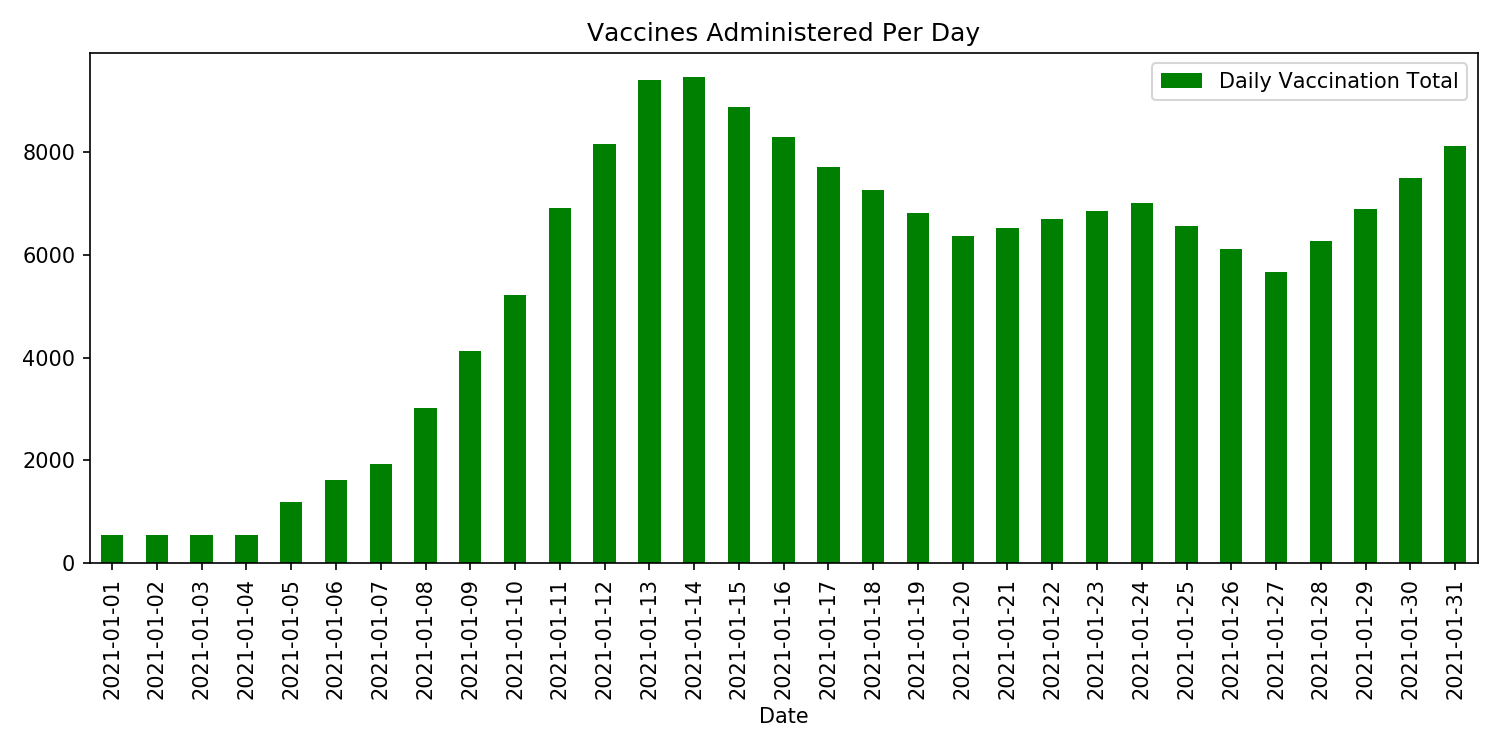

In [16]:
# Use DataFrame.plot() in order to create a bar chart of the data
final_daily_vac_df2.plot(kind="bar",label="Vaccines Administered", color=['green'], figsize=(10,5))

# Set a title for the chart
plt.title("Vaccines Administered Per Day")

plt.show()
plt.tight_layout()